# Reversal / Momentum - Time Horizon
In this homework, we explore how reversal tends to exist at shorter horizons and momentum at longer horizons. We do this on 4h cryptocurrency price data. Please first run the code below, which will download the price data (from Binance since 01/2020 to 12/2022) and compute returns based on it, stored in `ret`.

1. Use `ret` to generate rank-demeaned-normalized XS reversal strategies at 4,8,12,16,20, and 24 hour frequencies.
2. IE. for the 12 hour strategy, you will use the average return in the last three 4-hour bars to form a rank-demeaned-noramlzied XS portfolio and hold for the 4 hours.

In [73]:
from binance.client import Client as bnb_client
import datetime
import pandas as pd 
import numpy as np 

# client = bnb_client()
###  if you're in the US, use: 
# "client = bnb_client(tld='US')" here instead

client = bnb_client(tld='US')

def get_binance_px(symbol,freq,start_ts = '2020-01-01', end_ts = '2022-12-31'):
    data = client.get_historical_klines(symbol,freq,start_ts, end_ts)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
    'num_trades','taker_base_volume','taker_quote_volume','ignore']

    data = pd.DataFrame(data,columns = columns)
    
    # Convert from POSIX timestamp (number of millisecond since jan 1, 1970)
    data['open_time'] = data['open_time'].map(lambda x: datetime.datetime.fromtimestamp(x/1000, datetime.timezone.utc))
    data['close_time'] = data['close_time'].map(lambda x: datetime.datetime.fromtimestamp(x/1000, datetime.timezone.utc))
    return data 

univ = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT','DOTUSDT','MATICUSDT']

freq = '4h'
px = {}
for x in univ:
    data = get_binance_px(x,freq)
    px[x] = data.set_index('open_time')['close']

px = pd.DataFrame(px).astype(float)
px = px.reindex(pd.date_range(px.index[0],px.index[-1],freq=freq))
ret = px.pct_change()

C:\Users\joshu\AppData\Local\Temp\ipykernel_22360\2292102599.py:34: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ret = px.pct_change()


In [76]:
ret

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT
2020-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00+00:00,-0.003487,0.002612,0.003628,-0.003699,0.005771,NaN,NaN
2020-01-01 08:00:00+00:00,-0.001346,0.002452,0.000301,-0.003531,-0.008198,NaN,NaN
2020-01-01 12:00:00+00:00,0.005172,0.007643,0.010840,0.005803,0.003616,NaN,NaN
2020-01-01 16:00:00+00:00,-0.001286,0.001062,0.001192,-0.004987,0.002368,NaN,NaN
...,...,...,...,...,...,...,...
2022-12-30 08:00:00+00:00,0.000939,0.002155,0.006078,-0.000619,0.000000,0.000000,0.003979
2022-12-30 12:00:00+00:00,0.003666,0.003611,0.006786,0.006607,0.000000,0.007075,-0.001321
2022-12-30 16:00:00+00:00,-0.001654,0.000008,0.003740,-0.002424,0.000000,0.014052,0.002646
2022-12-30 20:00:00+00:00,0.005006,0.004117,0.004422,0.004741,0.000000,0.000000,0.002639


In [80]:
def simulate(time_horizon):
    adj_ret = ret.rolling(time_horizon, min_periods=1).mean()
    adj_ret = adj_ret.rank(1).apply(lambda x: -x + x.mean(),axis=1)
    adj_ret = adj_ret / adj_ret.abs().sum(1).values.reshape(-1,1)
    adj_ret = adj_ret.shift(1)
    return (adj_ret * ret).sum(1)
simulate(2)

2020-01-01 00:00:00+00:00    0.000000
2020-01-01 04:00:00+00:00    0.000000
2020-01-01 08:00:00+00:00    0.001281
2020-01-01 12:00:00+00:00   -0.001558
2020-01-01 16:00:00+00:00   -0.000616
                               ...   
2022-12-30 08:00:00+00:00    0.001672
2022-12-30 12:00:00+00:00    0.000507
2022-12-30 16:00:00+00:00   -0.002772
2022-12-30 20:00:00+00:00   -0.000275
2022-12-31 00:00:00+00:00    0.000464
Freq: 4h, Length: 6571, dtype: float64

3. Compute the Sharpe ratios of the reversal strategy at these different horizons.

Time Horizon: 4 hours
Sharpe Ratio:  2.5088037907013567
Time Horizon: 8 hours
Sharpe Ratio:  0.5998189431158457
Time Horizon: 12 hours
Sharpe Ratio:  -0.6616173769974604
Time Horizon: 16 hours
Sharpe Ratio:  -1.101220293896067
Time Horizon: 20 hours
Sharpe Ratio:  -1.426231174048379
Time Horizon: 24 hours
Sharpe Ratio:  -0.20680430373724687


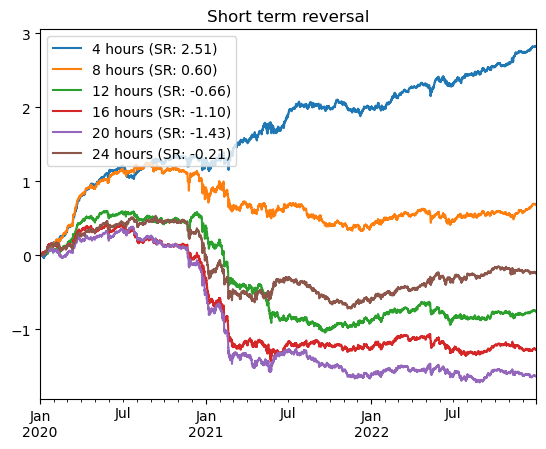

In [81]:
import matplotlib.pyplot as plt
for i in range(1, 7):
    print(f"Time Horizon: {4*i} hours")
    sim_ret = simulate(i)

    sharpe = sim_ret.mean()/sim_ret.std() * np.sqrt(6*365) 
    print("Sharpe Ratio: ", sharpe)

    sim_ret.cumsum().plot(label = f"{4*i} hours (SR: {sharpe:.2f})")
    #label legend
    plt.legend()
plt.title("Short term reversal")
plt.show()

4. At what horizons do you observe reversal vs. momentum?

Momentum at 12-20, and reversal at 4 and 8. Strong at 4.


5. The first bar typically contains the most reversal. "Skip" the first bar by lagging your portfolio by one 4h bar (similar to how UMD does at the monthly frequency). This should strengthen any momentum you see.

Time Horizon: 4 hours
Sharpe Ratio:  0.8662259682816523
Time Horizon: 8 hours
Sharpe Ratio:  2.0181514956138233
Time Horizon: 12 hours
Sharpe Ratio:  1.7856886146434106
Time Horizon: 16 hours
Sharpe Ratio:  1.7386994382540766
Time Horizon: 20 hours
Sharpe Ratio:  0.6576468270550957
Time Horizon: 24 hours
Sharpe Ratio:  0.7838170714890943


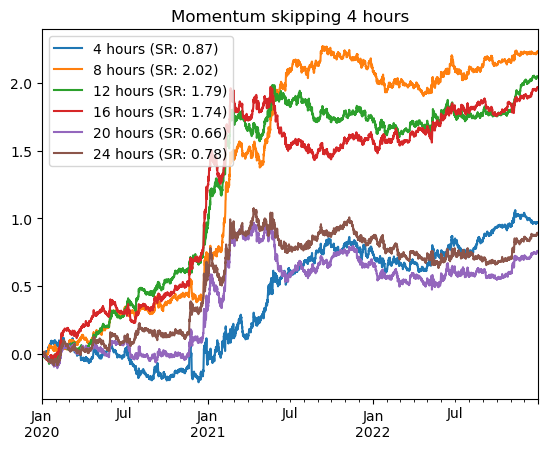

In [85]:
def simulate_momentum(time_horizon):
    adj_ret = ret.rolling(time_horizon, min_periods=1).mean()
    adj_ret = adj_ret.rank(1).apply(lambda x: x - x.mean(),axis=1)
    adj_ret = adj_ret / adj_ret.abs().sum(1).values.reshape(-1,1)
    adj_ret = adj_ret.shift(2)
    return (adj_ret * ret).sum(1)

for i in range(1, 7):
    print(f"Time Horizon: {4*i} hours")
    sim_ret = simulate_momentum(i)

    sharpe = sim_ret.mean()/sim_ret.std() * np.sqrt(6*365) 
    print("Sharpe Ratio: ", sharpe)

    sim_ret.cumsum().plot(label = f"{4*i} hours (SR: {sharpe:.2f})")
    #label legend
    plt.legend()
plt.title("Momentum skipping 4 hours")
plt.show()